In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:////Users/archanakale/Desktop/Starter_Code 14/Resources/hawaii.sqlite")

In [42]:
# Declare a Base using `automap_base()'
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()



['measurement', 'station']

In [43]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
# Create a session

session = Session(engine)

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Earliest Date: {earliest_date[0]} , Latest Date: {latest_date[0]}")


Earliest Date: 2010-01-01 , Latest Date: 2017-08-23


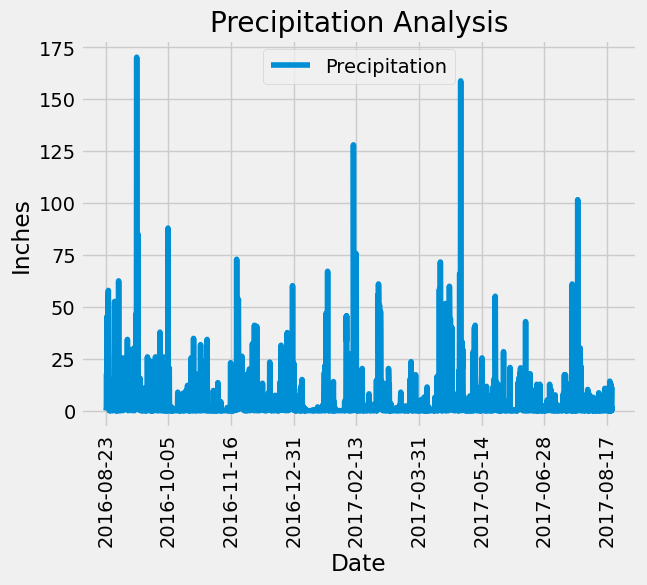

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

latest_date = dt.datetime.strptime(latest_date[0], '%Y-%m-%d')
year_ago = latest_date - dt.timedelta(days=365)
year_ago = year_ago.strftime('%Y-%m-%d')

precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df = precipitation_df.dropna()
precipitation_df = precipitation_df.sort_values('Date')
precipitation_df = precipitation_df.set_index('Date')
precipitation_df.plot(rot=90)
plt.ylabel('Inches')
plt.title('Precipitation Analysis')
plt.show()





In [51]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.id).count()
print(f'Total Stations: {total_stations}')



Total Stations: 9


In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

  

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
most_active_station
temperature_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
temperature_data

print(f"Lowest Temperature: {temperature_data[0][0]}")
print(f"Highest Temperature: {temperature_data[0][1]}")
print(f"Average Temperature: {temperature_data[0][2]}")

  



Lowest Temperature: 12.2
Highest Temperature: 29.4
Average Temperature: 22.03582251082252


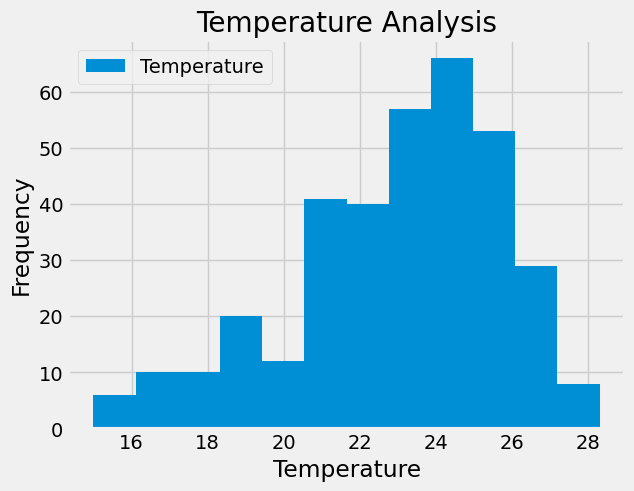

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation_data = session.query(Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == most_active_station).all()
temperature_observation_df = pd.DataFrame(temperature_observation_data, columns=['Temperature'])
temperature_observation_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Temperature Analysis')
plt.show()
  

# Close Session


In [61]:
# Close Session

session.close()
  

